In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Fraud.csv', on_bad_lines='skip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
df.shape

(477597, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477597 entries, 0 to 477596
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            477597 non-null  int64  
 1   type            477597 non-null  object 
 2   amount          477597 non-null  object 
 3   nameOrig        477597 non-null  object 
 4   oldbalanceOrg   477596 non-null  float64
 5   newbalanceOrig  477596 non-null  object 
 6   nameDest        477596 non-null  object 
 7   oldbalanceDest  477595 non-null  object 
 8   newbalanceDest  477595 non-null  float64
 9   isFraud         477595 non-null  float64
 10  isFlaggedFraud  477592 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 40.1+ MB


## Dropping Null values

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    2
newbalanceDest    2
isFraud           2
isFlaggedFraud    5
dtype: int64

In [8]:
df = df.dropna()

In [29]:
  
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [30]:
from sklearn import preprocessing

In [31]:
label_encoder = preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])

In [32]:
df['type'].unique()

array([3, 4, 1, 2, 0])

## Dropping outliers

In [9]:
## firstly lets see if the transaction value is correct or not
count=0
for i in range(len(df)-1):
  try:
    if ((df['oldbalanceOrg'][i])-df['newbalanceOrig'][i])!=df['amount'][i]:
      count+=1
  except:
    continue

In [10]:
count

386107

In [11]:
477597 - count

91490

In [12]:
df['newbalanceOrig']=pd.to_numeric(df['newbalanceOrig'])
df['amount'] = pd.to_numeric(df['amount'])
df['oldbalanceDest'] = pd.to_numeric(df['oldbalanceDest'])
df['newbalanceDest'] = pd.to_numeric(df['newbalanceDest'])

In [13]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 10,6

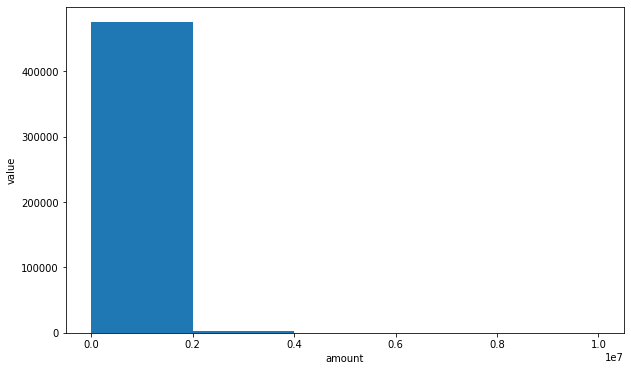

In [14]:
plt.hist(df.amount ,bins=5,rwidth=1)
plt.xlabel('amount')
plt.ylabel('value')
plt.show()

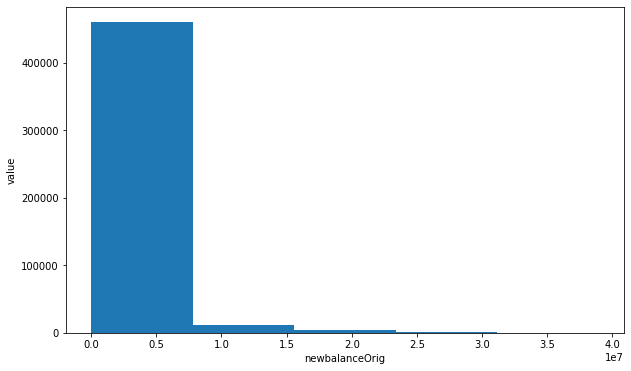

In [15]:
plt.hist(df.newbalanceOrig ,bins=5,rwidth=1)
plt.xlabel('newbalanceOrig')
plt.ylabel('value')
plt.show()

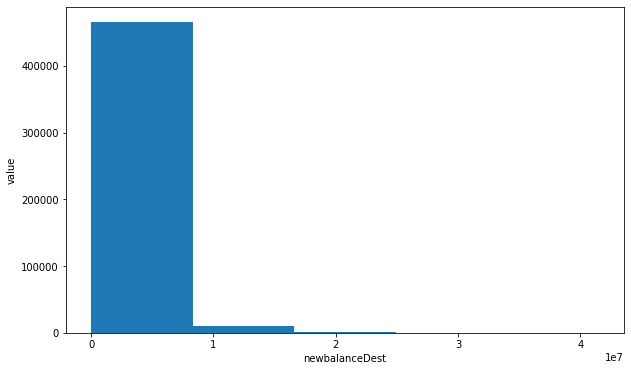

In [16]:
plt.hist(df.newbalanceDest ,bins=5,rwidth=1)
plt.xlabel('newbalanceDest')
plt.ylabel('value')
plt.show()

In [17]:
# outliers = []

# def detect_outliers(data):

#   threshold = 3
#   mean = np.mean(data)
#   std = np.std(data)

#   for i in data

In [18]:
threshold = 4
mean = np.mean(df['amount'])
std = np.std(df['amount'])
outliers = []

Dropping the outliers

In [19]:
for i in df['amount']:
  z_score = (i-mean)/std
  try:
    if np.abs(z_score)>threshold:
      outliers.append(i)
      df.drop([i], axis=0, inplace=True)
  except:
    continue

print(len(outliers))


6246


In [20]:
## outliers in step
s_outliers = []

In [21]:
for i in df['amount']:
  z_score = (i-mean)/std
  try:
    if np.abs(z_score)>threshold:
      s_outliers.append(i)
      df.drop([i], axis=0, inplace=True)
  except:
    continue

print(len(s_outliers))


6246


In [22]:
df.shape

(477592, 11)

### No of fraud values

In [23]:
df['isFraud'].value_counts()[1.0]

227

### Correct Transactions

In [24]:
df['isFraud'].value_counts()[0.0]

477365

## Multi-collinearity

## Independent variables
#### -step
#### -Amount 
#### -Type
#### -oldbalanceOrg
#### - oldbalanceDest

## Dependent Variables
#### - isFraud
#### - newbalanceDest
#### - newbalanceOrig

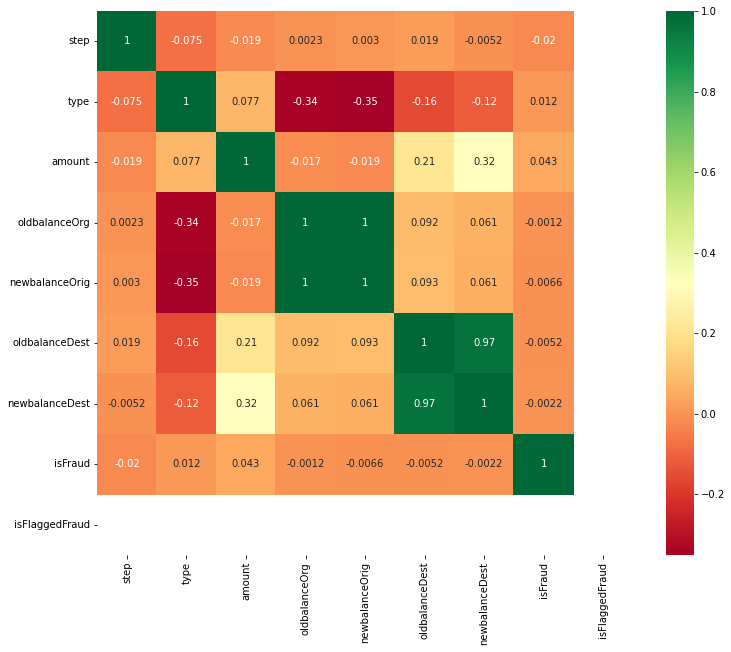

In [33]:
# lets check the collineairity between all the variables through a heat map
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')


In [26]:
## The correlation is between step and amount
## lets analyse them seperately

In [27]:
# df.plot(x="isFraud", y=["step", "amount"], kind="bar", figsize=(9, 8))

## Training our model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier



#### Taking the variables - step,amount and type since they have the maximum collinearity

In [43]:
x = pd.concat([df['amount'], df['step'] , df['type']], axis=1)
y = df['isFraud']

In [44]:
x.head()

,amount,step,type
0,9839.64,1,3
1,1864.28,1,3
2,181.00,1,4
3,181.00,1,1
4,11668.14,1,3


In [46]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()


In [48]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')


In [49]:
#lets look at the accuracy of each classifier on the test set
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.9994416449140832
RandomForestClassifier 0.9993788299669175
SVC 0.999455603791231
VotingClassifier 0.999455603791231


In [50]:
## the accuracy of our voting classifier is 99.94 which is an abundant
## we may not need to fine tune it further

In [51]:
## for the compnay to proceed safe transaction should firslty limit the amount of money to be transacted, 
## since it has maximum pearson coefficient, certain amount of transaction follow a certain pattern 
## like the amount less than 200 and greater than 20k are more likely to be fraud

In [52]:
## secondly the time stamps , i'e number of steps should be checked in similar way
## and lastly type of transaction, it was very minutely correlated to the fraud label, but still it affects